# Figure 5 and Supplemental Figure S2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import glob
sns.set_style('whitegrid')
from skbio.diversity import beta_diversity
import numpy as np
from skbio.stats.distance import mantel
from skbio.stats.ordination import pcoa
import pandas as pd
from skbio.stats.distance import anosim

In [4]:
def parse_vcf(file_name):
    gm_fh=open(file_name)
    #parse files
    tsv = []
    for line in gm_fh:
        sline=line.strip().split()
        if not sline[0].startswith("#"):
            tsv.append(sline)
            
    AO=[]
    RO=[]
    AB=[]
    AB2=[]
    AB3=[]
    AB4=[]
    for line in tsv:
        sline=line[7].split(';')
        freq=sline[0].split('=')[1]
        #values = freq.split(',')
        
        AO = sline[5].split('=')[1].split(',')
        AO= [int(num) for num in AO]
        #AO = [int(num) for num in AO if int(num) >= 3]
        if len(AO) >= 1:
            RO = int(sline[28].split('=')[1])
            total = sum(AO) + RO
            values = [el/total for el in AO]
            values.append(RO/total)
        
            if len(values) == 2:
                if float(values[0]) > 0:
                    #values.append(str(1.-float(values[0])))
                    values_sort = sorted(values)
                    AB.append(float(values_sort[-1]))
                    AB2.append(float(values_sort[0]))
            elif len(values) == 3:
                if float(values[0]) > 0:
                    #values.append(str(1. - ( float(values[-2]) + float(values[-1]) ) ))
                    values_sort = sorted(values)
                    AB.append(float(values_sort[-1]))
                    AB2.append(float(values_sort[-2]))
                    AB3.append(float(values_sort[0]))
            elif len(values) == 4:
                if float(values[0]) > 0:
                    #values.append(str(1.-(float(values[-1])+float(values[-2])+float(values[-3]))))
                    values_sort = sorted(values)
                    AB.append(float(values_sort[-1]))
                    AB2.append(float(values_sort[-2]))
                    AB3.append(float(values_sort[-3]))
                    AB4.append(float(values_sort[0]))
                
    dict_stats = {}
    dict_stats['AB3'] = []
    dict_stats['AB4'] = []
    dict_stats['AB'] = AB
    dict_stats['AB2'] = AB2
    dict_stats['AB3'] = AB3
    dict_stats['AB4'] = AB4
    
    return dict_stats

In [5]:
def plot_SNP_freq(vcf_stats, title):
    plt.hist([ vcf_stats['AB'], vcf_stats['AB2'], vcf_stats['AB3'], vcf_stats['AB4'] ], bins=100, stacked=True, color = ['black', 'red', 'blue', 'cyan'])
    plt.xlim(0.1,0.9)
    plt.ylim(0,200)
    plt.grid(False)
    plt.xlabel('Frequency')
    plt.ylabel('Variant count')
    plt.title(title)
    #plt.hist(AB, bins=100)
    #plt.savefig('AWRI1499.pdf')
    #plt.show()

# Figure 5A

In [61]:
albicans_ref = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/new_albicans_1.sam.bam.rmdup.vcf")
parap_ref = parse_vcf("/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/parapsilosis/parapsilosis.sam.bam.rmdup.vcf")
parap_denovo = parse_vcf("/data8/Human/FungiPaper/SNPcalling/mapping/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_000G1.sam.bam.rmdup.vcf")
purpur_denovo = parse_vcf("/data8/Human/FungiPaper/SNPcalling/mapping/S2_003_000R1_concoct_16/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf")

In [8]:
mono_lake_choano = parse_vcf("/groups/banfield/users/pwest/mono_lake/choana_genomes/bins/mapping/Ascaf_vs_Creads_mapped.sam.sorted.rmdup.vcf")

In [11]:
len(mono_lake_choano)

4

In [20]:
len(mono_lake_choano['AB2'])

12377

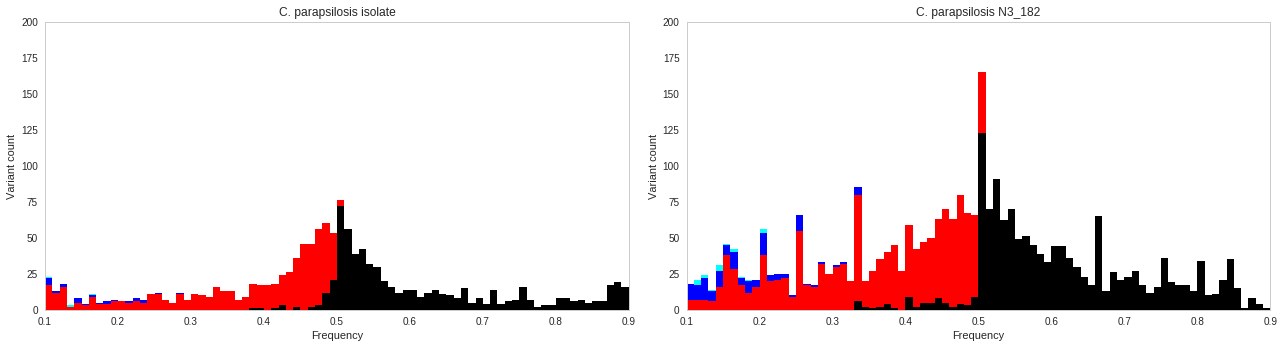

In [65]:
plt.subplot(1, 2, 1)
plot_SNP_freq(parap_ref, "C. parapsilosis isolate")
plt.subplot(1, 2, 2)
plot_SNP_freq(parap_denovo, "C. parapsilosis N3_182")
#plt.subplot(1, 3, 3)
#plot_SNP_freq(purpur_denovo, "P. lilacilum S2_003")
plt.gcf().set_size_inches(18, 5)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('figureG_3panel_parap_ref.pdf')
plt.show()

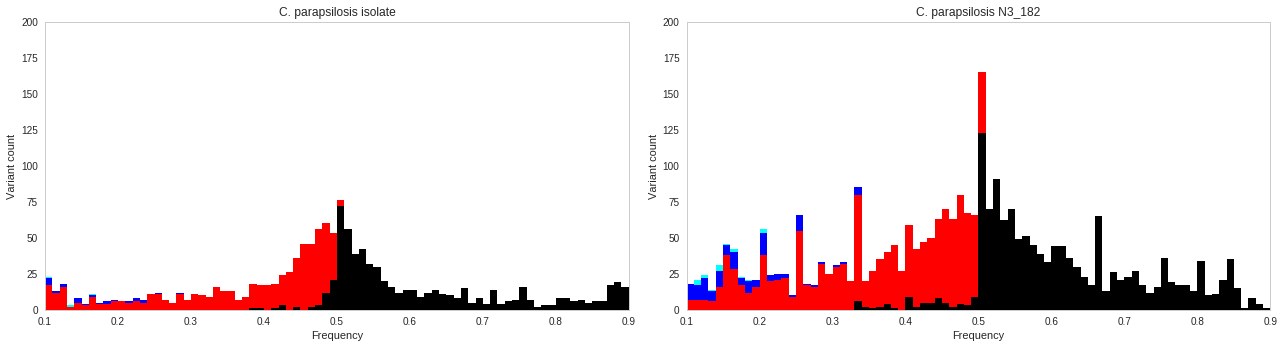

In [5]:
plt.subplot(1, 2, 1)
plot_SNP_freq(parap_ref, "C. parapsilosis isolate")
plt.subplot(1, 2, 2)
plot_SNP_freq(parap_denovo, "C. parapsilosis N3_182")
#plt.subplot(1, 3, 3)
#plot_SNP_freq(purpur_denovo, "P. lilacilum S2_003")
plt.gcf().set_size_inches(18, 5)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig('figureG_3panel_parap_ref.pdf')
plt.show()

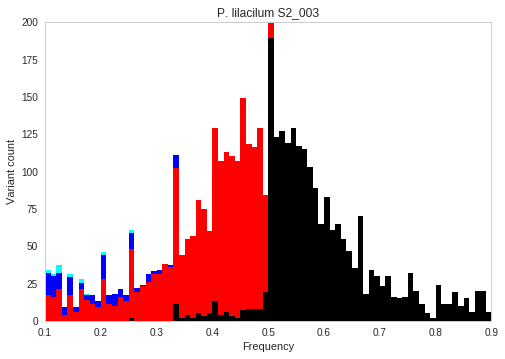

In [67]:
plot_SNP_freq(purpur_denovo, "P. lilacilum S2_003")
plt.savefig('supplemental_purpur_allele_freq.pdf')

In [6]:
def build_snp_info_table(name, genome_length, file_path):
    stats = parse_vcf(file_path)
    stats['genome_length'] = genome_length
    stats['name'] = name
    stats['total_multiallelic'] = len([element for element in stats['AB3'] if element >= .1])
    stats['total'] = len([element for element in stats['AB'] if element >= .1])
    return stats

In [7]:
def plot_SNP_freq(vcf_stats, title):
    plt.hist([ vcf_stats['AB'], vcf_stats['AB2'], vcf_stats['AB3'], vcf_stats['AB4'] ], bins=100, stacked=True, color = ['black', 'red', 'blue', 'cyan'])
    plt.xlim(0.1,0.9)
    plt.ylim(0,200)
    plt.grid(False)
    plt.xlabel('Frequency')
    plt.ylabel('Variant count')
    plt.title(title)
    #plt.hist(AB, bins=100)
    #plt.savefig('AWRI1499.pdf')
    #plt.show()

In [27]:
sim_allele_stats = []
sim_allele_stats.append(build_snp_info_table('Simulated haploid 10x', 14509911, "vcfs/haploid_10x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated haploid 100x', 14509911, "vcfs/haploid_reads_100x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated diploid 10x', 14509911, "vcfs/diploid_10x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated diploid 100x', 14509911, "vcfs/diploid_reads_100x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated triploid 10x', 14509911, "vcfs/triploid_10x.sam.bam.rmdup.vcf"))
sim_allele_stats.append(build_snp_info_table('Simulated triploid 100x', 14509911, "vcfs/triploid_reads_100x.sam.bam.rmdup.vcf"))

# Figure 5 B and C

In [28]:
allele_stats = []
allele_stats.append(build_snp_info_table('C. albicans isolate', 14509911, "vcfs/new_albicans_1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. parapsilosis isolate', 13030174, "vcfs/parapsilosis.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. albicans SP_CRL_000G1', 12561678, "vcfs/SP_CRL_000G1_concoct_7.fasta-vs-SP_CRL_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. parapsilosis N3_182_000G1', 12563647, "vcfs/S2_005_002R2_concoct_43.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. lusitaniae N2_070_000G1', 11907650, "vcfs/N2_070_000G1_concoct_33.fasta-vs-N2_070_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('P. lilacinum S2_003_000R1', 35724498, "vcfs/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('P. lilacinum S2_018_006G1', 35688710, "vcfs/S2_018_006G1_concoct_14.fasta-vs-S2_018_006G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('N. haematococca S2_018_000R2', 44952822, "vcfs/S2_018_000_R2_1.fasta-vs-S2_018_000_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('N. haematococca S2_009_000R2', 31143909, "vcfs/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Exophilia sp. S2_009_000R2', 24670482, "vcfs/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Verruconis sp. S2_005_001R2', 15639153, "vcfs/S2_005_001_R2_2.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('T. asahii N5_275_008G1', 23419590, "vcfs/N5_275_008G1_concoct_53.fasta-vs-N5_275_008G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Malassesia sp. S2_018_000R1', 6457898, "vcfs/S2_018_000R1_concoct_23.fasta-vs-S2_018_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Rhabtida S2_005_001R2', 50505025, "vcfs/S2_005_001_R2_1.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Diptera S2_005_002R2', 43769201, "vcfs/S2_005_002R2_concoct_11.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))

In [10]:
names = []
percent_multi = []
SNPs_per_kb = []
for table in allele_stats:
    names.append(table['name'])
    percent_multi.append(table['total_multiallelic']/table['total'] * 100)
    SNPs_per_kb.append(table['total']/table['genome_length'] * 1000)

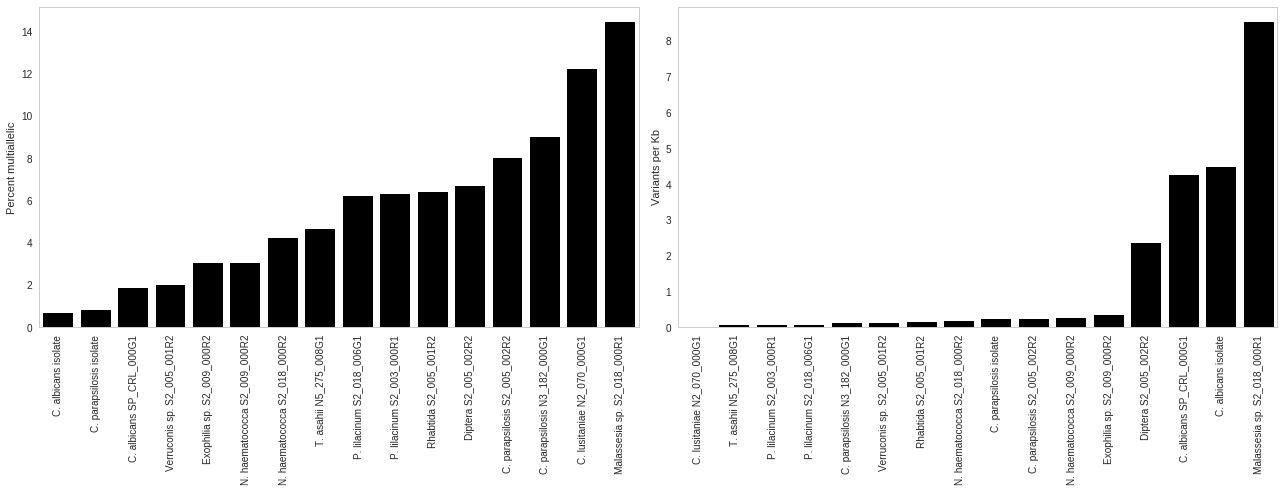

In [19]:
plt.subplot(1, 2, 1)
s_name = [x for _,x in sorted(zip(percent_multi,names))]
s_multi = sorted(percent_multi)
ax = sns.barplot(x=s_name, y=s_multi, color="black")
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Percent multiallelic')
plt.subplot(1, 2, 2)
s_name = [x for _,x in sorted(zip(SNPs_per_kb,names))]
s_SNPs_per_kb = sorted(SNPs_per_kb)
ax = sns.barplot(x=s_name, y=s_SNPs_per_kb, color="black") 
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Variants per Kb')
plt.gcf().set_size_inches(18, 7)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig('figureG_bottompanel_barplots.pdf')

# Simulated Reads Variant Frequency plots
### (Supplemental Figure S2)

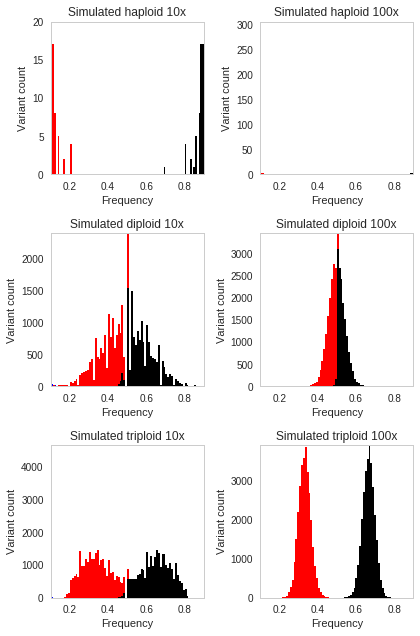

In [20]:
for i in range(0, 3):
    for j in range(0, 2):
        plt.subplot(3, 2, i*2+j+1)
        plot_SNP_freq(sim_allele_stats[i*2+j], sim_allele_stats[i*2+j]['name'])
plt.gcf().set_size_inches(6, 9)
plt.tight_layout()
#plt.savefig('suppA_sim_ploidy.pdf')
plt.show()

# Other Genomic Variant Frequency plots
### (Supplemental Figure S2)

In [8]:
allele_stats = []
#allele_stats.append(build_snp_info_table('C. albicans isolate', 14509911, "/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/new_albicans_1.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table('C. parapsilosis isolate', 13030174, "/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/parapsilosis/parapsilosis.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. albicans SP_CRL_000G1', 12561678, "/data8/Human/FungiPaper/SNPcalling/mapping/SP_CRL_000G1_concoct_7/SP_CRL_000G1_concoct_7.fasta-vs-SP_CRL_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. parapsilosis N3_182_000G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/mapping/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. parapsilosis S2_005_002R2', 11573959, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_002R2_concoct_43/S2_005_002R2_concoct_43.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('C. lusitaniae N2_070_000G1', 11907650, "/data8/Human/FungiPaper/SNPcalling/mapping/N2_070_000G1_concoct_33/N2_070_000G1_concoct_33.fasta-vs-N2_070_000G1.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table('P. lilacinum S2_003_000R1', 35724498, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_003_000R1_concoct_16/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('P. lilacinum S2_018_006G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_006G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('N. haematococca S2_018_000R2', 44952822, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_000_R2_1/S2_018_000_R2_1.fasta-vs-S2_018_000_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('N. haematococca S2_009_000R2', 31143909, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_009_000R2_concoct_70/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Exophilia sp. S2_009_000R2', 24670482, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_009_000R2_concoct_70/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Verruconis sp. S2_005_001R2', 15639153, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_001_R2_2/S2_005_001_R2_2.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('T. asahii N5_275_008G1', 23419590, "/data8/Human/FungiPaper/SNPcalling/mapping/N5_275_008G1_concoct_53/N5_275_008G1_concoct_53.fasta-vs-N5_275_008G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Malassesia sp. S2_018_000R1', 6457898, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_000R1_concoct_23/S2_018_000R1_concoct_23.fasta-vs-S2_018_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Rhabtida S2_005_001R2', 50505025, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_001_R2_1/S2_005_001_R2_1.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table('Diptera S2_005_002R2', 43769201, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_002R2_concoct_11/S2_005_002R2_concoct_11.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))

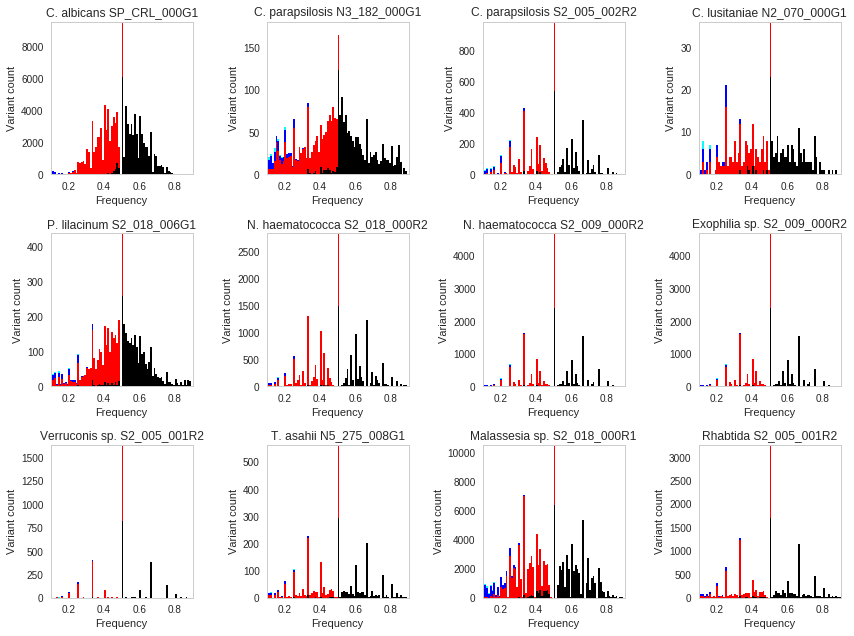

In [22]:
for i in range(0, 3):
    for j in range(0, 4):
        plt.subplot(3, 4, i*4+j+1)
        plot_SNP_freq(allele_stats[i*4+j], allele_stats[i*4+j]['name'])
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.savefig('suppA_ploidy.pdf')
plt.show()

# Coverage Depth Filtered Plots

In [6]:
def parse_vcf_DP_filt(file_name, min_DP, max_DP):
    gm_fh=open(file_name)
    #parse files
    tsv = []
    for line in gm_fh:
        sline=line.strip().split()
        if not sline[0].startswith("#"):
            tsv.append(sline)
            
    AO=[]
    RO=[]
    AB=[]
    AB2=[]
    AB3=[]
    AB4=[]
    NA=[]
    DP=[]
    for line in tsv:
        sline=line[7].split(';')
        freq=sline[0].split('=')[1]
        #values = freq.split(',')
        
        AO = sline[5].split('=')[1].split(',')
        AO= [int(num) for num in AO]
        #AO = [int(num) for num in AO if int(num) >= 3]
        if len(AO) >= 1:
            RO = int(sline[28].split('=')[1])
            total = sum(AO) + RO
            values = [el/total for el in AO]
            values.append(RO/total)
            
            if (int(sline[7].split('=')[1]) >= min_DP and int(sline[7].split('=')[1]) <= max_DP):
        
                if len(values) == 2:
                    if float(values[0]) > 0:
                        #values.append(str(1.-float(values[0])))
                        values_sort = sorted(values)
                        AB.append(float(values_sort[-1]))
                        AB2.append(float(values_sort[0]))
                        if( float(values_sort[0]) > 0.1 ):
                            NA.append(2)
                            DP.append(int(sline[7].split('=')[1]))

                elif len(values) == 3:
                    if float(values[0]) > 0:
                        #values.append(str(1. - ( float(values[-2]) + float(values[-1]) ) ))
                        values_sort = sorted(values)
                        AB.append(float(values_sort[-1]))
                        AB2.append(float(values_sort[-2]))
                        AB3.append(float(values_sort[0]))
                        if( float(values_sort[0]) > 0.1 ):
                            NA.append(3)
                            DP.append(int(sline[7].split('=')[1]))
                elif len(values) == 4:
                    if float(values[0]) > 0:
                        #values.append(str(1.-(float(values[-1])+float(values[-2])+float(values[-3]))))
                        values_sort = sorted(values)
                        AB.append(float(values_sort[-1]))
                        AB2.append(float(values_sort[-2]))
                        AB3.append(float(values_sort[-3]))
                        AB4.append(float(values_sort[0]))
                        if( float(values_sort[0]) > 0.1 ):
                            NA.append(4)
                            DP.append(int(sline[7].split('=')[1]))
                        elif( float(values_sort[-3]) > 0.1 ):
                            NA.append(3)
                            DP.append(int(sline[7].split('=')[1]))
                
    dict_stats = {}
    dict_stats['AB3'] = []
    dict_stats['AB4'] = []
    dict_stats['AB'] = AB
    dict_stats['AB2'] = AB2
    dict_stats['AB3'] = AB3
    dict_stats['AB4'] = AB4
    dict_stats['DP'] = DP
    dict_stats['NA'] = NA
    
    return dict_stats

In [7]:
def build_snp_info_table_DP_filt(min_DP, max_DP, name, genome_length, file_path):
    stats = parse_vcf_DP_filt(file_path, min_DP, max_DP)
    stats['genome_length'] = genome_length
    stats['name'] = name
    stats['total_multiallelic'] = len([element for element in stats['AB3'] if element >= .1])
    stats['total'] = len([element for element in stats['AB'] if element >= .1])
    return stats

In [58]:
allele_stats = []
allele_stats.append(build_snp_info_table_DP_filt(60,180,'C. albicans isolate', 14509911, "/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/new_albicans_1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(100,200,'C. parapsilosis isolate', 13030174, "/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/parapsilosis/parapsilosis.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(15,45,'C. albicans SP_CRL_000G1', 12561678, "/data8/Human/FungiPaper/SNPcalling/mapping/SP_CRL_000G1_concoct_7/SP_CRL_000G1_concoct_7.fasta-vs-SP_CRL_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(90,270,'C. parapsilosis N3_182_000G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/mapping/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(4,14,'C. parapsilosis S2_005_002R2', 11573959, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_002R2_concoct_43/S2_005_002R2_concoct_43.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table_DP_filt(9,27,'C. lusitaniae N2_070_000G1', 11907650, "/data8/Human/FungiPaper/SNPcalling/mapping/N2_070_000G1_concoct_33/N2_070_000G1_concoct_33.fasta-vs-N2_070_000G1.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table_DP_filt(35,105,'P. lilacinum S2_003_000R1', 35724498, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_003_000R1_concoct_16/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table_DP_filt(10,30,'P. lilacinum S2_018_006G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_006G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(5,15,'N. haematococca S2_018_000R2', 44952822, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_000_R2_1/S2_018_000_R2_1.fasta-vs-S2_018_000_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(3,11,'N. haematococca S2_009_000R2', 31143909, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/Pats_megabin_Sordariomycetes/Pats_megabin_Sordariomycetes.fasta-vs-S2_009_000R2.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(3,11,'Exophilia sp. S2_009_000R2', 24670482, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/Pats_megabin_Eurotiomycetes/Pats_megabin_Eurotiomycetes.fasta-vs-S2_009_000R2.bam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table_DP_filt(3,11,'N. haematococca S2_009_000R2', 31143909, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_009_000R2_concoct_70/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table_DP_filt(3,11,'Exophilia sp. S2_009_000R2', 24670482, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_009_000R2_concoct_70/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(3,9,'Verruconis sp. S2_005_001R2', 15639153, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_001_R2_2/S2_005_001_R2_2.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(7,21,'T. asahii N5_275_008G1', 23419590, "/data8/Human/FungiPaper/SNPcalling/mapping/N5_275_008G1_concoct_53/N5_275_008G1_concoct_53.fasta-vs-N5_275_008G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(9,27,'Malassesia sp. S2_018_000R1', 6457898, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_000R1_concoct_23/S2_018_000R1_concoct_23.fasta-vs-S2_018_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(4,12,'Rhabtida S2_005_001R2', 50505025, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_001_R2_1/S2_005_001_R2_1.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(5,15,'Diptera S2_005_002R2', 43769201, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_002R2_concoct_11/S2_005_002R2_concoct_11.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))

In [59]:
names = []
percent_multi = []
SNPs_per_kb = []
for table in allele_stats:
    names.append(table['name'])
    percent_multi.append(table['total_multiallelic']/table['total'] * 100)
    SNPs_per_kb.append(table['total']/table['genome_length'] * 1000)

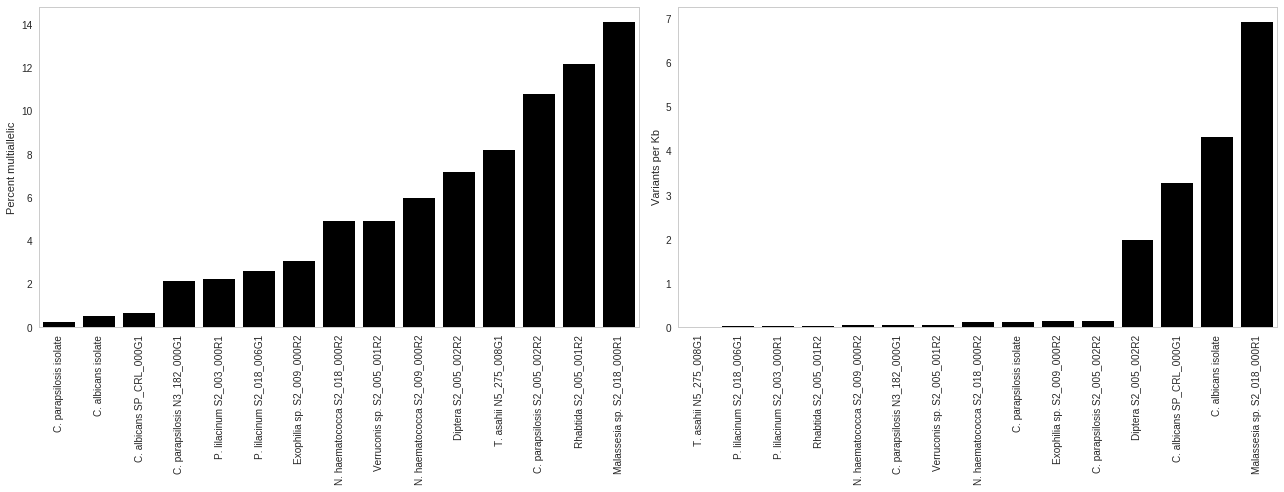

In [99]:
plt.subplot(1, 2, 1)
s_name = [x for _,x in sorted(zip(percent_multi,names))]
s_multi = sorted(percent_multi)
ax = sns.barplot(x=s_name, y=s_multi, color="black")
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Percent multiallelic')
plt.subplot(1, 2, 2)
s_name = [x for _,x in sorted(zip(SNPs_per_kb,names))]
s_SNPs_per_kb = sorted(SNPs_per_kb)
ax = sns.barplot(x=s_name, y=s_SNPs_per_kb, color="black") 
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Variants per Kb')
plt.gcf().set_size_inches(18, 7)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('figureG_bottompanel_barplots.pdf')

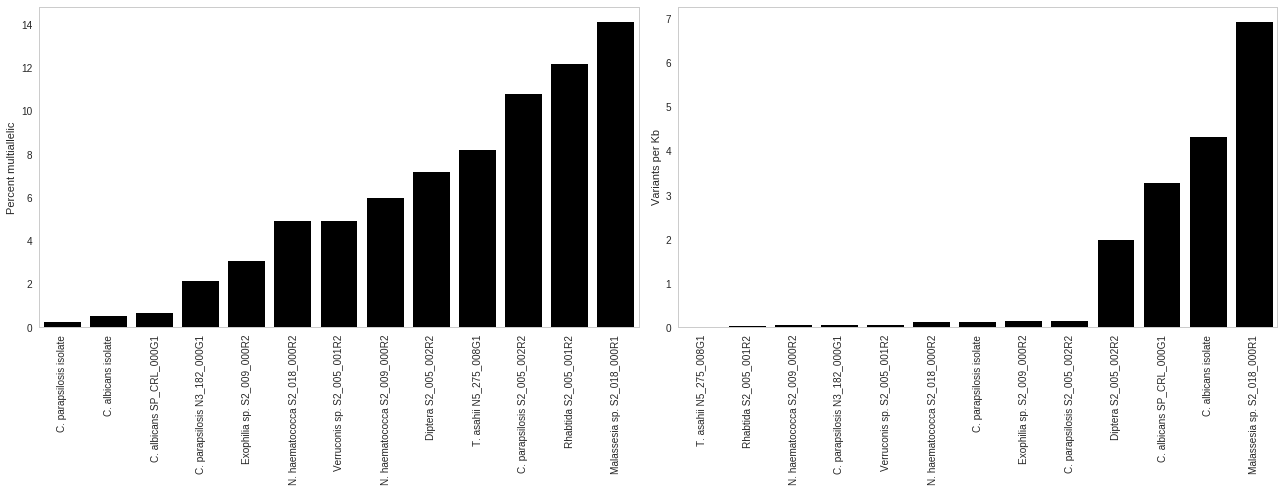

In [60]:
plt.subplot(1, 2, 1)
s_name = [x for _,x in sorted(zip(percent_multi,names))]
s_multi = sorted(percent_multi)
ax = sns.barplot(x=s_name, y=s_multi, color="black")
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Percent multiallelic')
plt.subplot(1, 2, 2)
s_name = [x for _,x in sorted(zip(SNPs_per_kb,names))]
s_SNPs_per_kb = sorted(SNPs_per_kb)
ax = sns.barplot(x=s_name, y=s_SNPs_per_kb, color="black") 
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Variants per Kb')
plt.gcf().set_size_inches(18, 7)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('figureG_bottompanel_barplots.pdf')

In [94]:
### These still need to be fixed. Specifically: ylims need to be dynamically adjusted and the right plots need to be amde (c. albicans ref removed etc.)

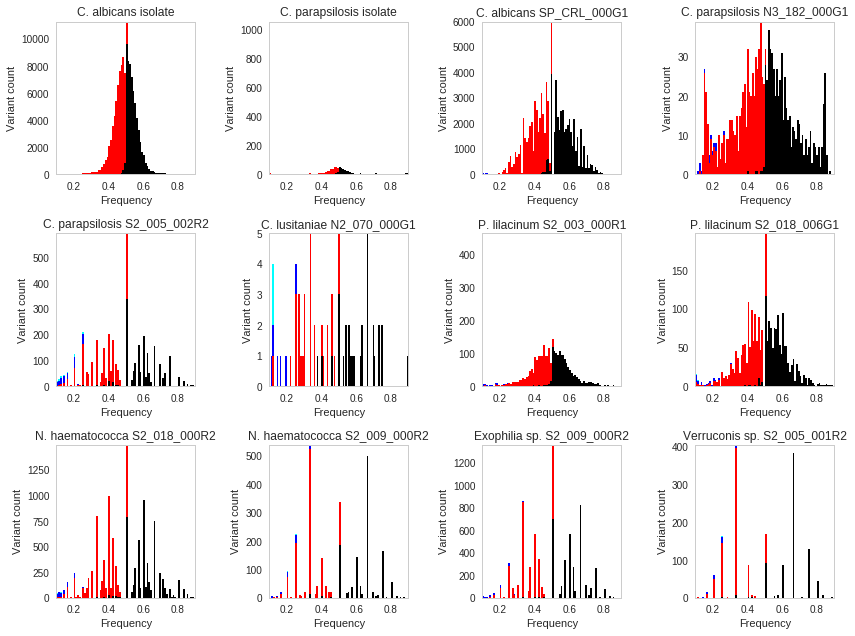

In [95]:
for i in range(0, 3):
    for j in range(0, 4):
        plt.subplot(3, 4, i*4+j+1)
        plot_SNP_freq(allele_stats[i*4+j], allele_stats[i*4+j]['name'])
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.savefig('suppA_ploidy.pdf')
plt.show()

In [28]:
percent_multi

[0.524578662882472,
 0.2368265245707519,
 0.6477909600407599,
 2.152317880794702,
 10.763097949886106,
 4.886594136087036,
 5.96078431372549,
 3.061224489795918,
 4.905660377358491,
 8.188585607940446,
 14.099526066350712,
 12.143559488692231,
 7.167922683081171]

In [15]:
s_name

['T. asahii N5_275_008G1',
 'Rhabtida S2_005_001R2',
 'N. haematococca S2_009_000R2',
 'C. parapsilosis N3_182_000G1',
 'Verruconis sp. S2_005_001R2',
 'N. haematococca S2_018_000R2',
 'C. parapsilosis isolate',
 'Exophilia sp. S2_009_000R2',
 'C. parapsilosis S2_005_002R2',
 'Diptera S2_005_002R2',
 'C. albicans SP_CRL_000G1',
 'C. albicans isolate',
 'Malassesia sp. S2_018_000R1']

In [16]:
s_multi

[0.2368265245707519,
 0.524578662882472,
 0.6477909600407599,
 2.152317880794702,
 3.061224489795918,
 4.886594136087036,
 4.905660377358491,
 5.96078431372549,
 7.167922683081171,
 8.188585607940446,
 10.763097949886106,
 12.143559488692231,
 14.099526066350712]

In [17]:
gut=[s_multi[2]] + [s_multi[9]] + [s_multi[3]]
room=[s_multi[4]] + [s_multi[5]] + [s_multi[6]] + [s_multi[7]] + [s_multi[9]] + [s_multi[10]] + [s_multi[8]] + [s_multi[12]]

In [18]:
data = []
data.append(gut)
data.append(room)

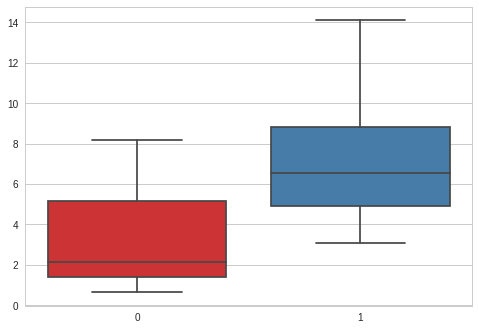

In [19]:
sns.set_palette('Set1')
sns.boxplot(data=data)
#sns.swarmplot(data=data)
plt.savefig('figure5_boxplot.pdf')

In [20]:
from scipy.stats import ttest_ind
from scipy.stats import ranksums

In [21]:
stat, p = ranksums(gut, room)

In [22]:
p

0.18457255283988294

In [25]:
s_multi

[0.2368265245707519,
 0.524578662882472,
 0.6477909600407599,
 2.152317880794702,
 3.061224489795918,
 4.886594136087036,
 4.905660377358491,
 5.96078431372549,
 7.167922683081171,
 8.188585607940446,
 10.763097949886106,
 12.143559488692231,
 14.099526066350712]

In [26]:
s_SNPs_per_kb

[0.017207816191487556,
 0.04027322033797627,
 0.04093898424889438,
 0.0480752125557173,
 0.05083395501022338,
 0.12063758755790682,
 0.12962221379392172,
 0.14300490764631188,
 0.15171990846001787,
 1.985757062369039,
 3.281169920133282,
 4.322355940019205,
 6.926712066372061]

In [27]:
for table in allele_stats:
    print(str(table['name']) + "\t" + str(table['total']))

C. albicans isolate	62717
C. parapsilosis isolate	1689
C. albicans SP_CRL_000G1	41217
C. parapsilosis N3_182_000G1	604
C. parapsilosis S2_005_002R2	1756
N. haematococca S2_018_000R2	5423
N. haematococca S2_009_000R2	1275
Exophilia sp. S2_009_000R2	3528
Verruconis sp. S2_005_001R2	795
T. asahii N5_275_008G1	403
Malassesia sp. S2_018_000R1	44732
Rhabtida S2_005_001R2	2034
Diptera S2_005_002R2	86915


In [84]:
5978/24670482*1000

0.24231387128958404

# Including alternate DOL samples from same baby

In [60]:
allele_stats = []
allele_stats.append(build_snp_info_table_DP_filt(60,180,'C. albicans isolate', 14509911, "/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/new_albicans_1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(100,200,'C. parapsilosis isolate', 13030174, "/data8/Human/FungiPaper/comparative_genomics/reference_ploidy/parapsilosis/parapsilosis.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(15,45,'C. albicans SP_CRL_000G1', 12561678, "/data8/Human/FungiPaper/SNPcalling/mapping/SP_CRL_000G1_concoct_7/SP_CRL_000G1_concoct_7.fasta-vs-SP_CRL_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(5,15,'C. albicans SP_CRL_017G2', 12561678, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/SP_CRL_000G1_concoct_7/SP_CRL_000G1_concoct_7.fasta-vs-SP_CRL_017G2.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(90,270,'C. parapsilosis N3_182_000G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/mapping/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(70,190,'C. parapsilosis N3_182_019G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_019G1.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(25,75,'C. parapsilosis N3_182_020G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_020G1.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(4,14,'C. parapsilosis S2_005_002R2', 11573959, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_002R2_concoct_43/S2_005_002R2_concoct_43.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table_DP_filt(9,27,'C. lusitaniae N2_070_000G1', 11907650, "/data8/Human/FungiPaper/SNPcalling/mapping/N2_070_000G1_concoct_33/N2_070_000G1_concoct_33.fasta-vs-N2_070_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(35,105,'P. lilacinum S2_003_000R1', 35724498, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_003_000R1_concoct_16/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(10,30,'P. lilacinum S2_018_006G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_006G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(7,21,'P. lilacinum S2_018_000G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_000G1.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(5,15,'P. lilacinum S2_018_007G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_007G1.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(5,15,'N. haematococca S2_018_000R2', 44952822, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_000_R2_1/S2_018_000_R2_1.fasta-vs-S2_018_000_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(3,11,'N. haematococca S2_009_000R2', 31143909, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/Pats_megabin_Sordariomycetes/Pats_megabin_Sordariomycetes.fasta-vs-S2_009_000R2.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(3,11,'Exophilia sp. S2_009_000R2', 24670482, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/Pats_megabin_Eurotiomycetes/Pats_megabin_Eurotiomycetes.fasta-vs-S2_009_000R2.bam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table_DP_filt(3,11,'N. haematococca S2_009_000R2', 31143909, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_009_000R2_concoct_70/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
#allele_stats.append(build_snp_info_table_DP_filt(3,11,'Exophilia sp. S2_009_000R2', 24670482, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_009_000R2_concoct_70/S2_009_000R2_concoct_70.fasta-vs-S2_009_000R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(3,9,'Verruconis sp. S2_005_001R2', 15639153, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_001_R2_2/S2_005_001_R2_2.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(7,21,'T. asahii N5_275_008G1', 23419590, "/data8/Human/FungiPaper/SNPcalling/mapping/N5_275_008G1_concoct_53/N5_275_008G1_concoct_53.fasta-vs-N5_275_008G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(7,21,'T. asahii N5_275_000G1', 23419590, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/N5_275_008G1_concoct_53/N5_275_008G1_concoct_53.fasta-vs-N5_275_000G1.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(9,27,'Malassesia sp. S2_018_000R1', 6457898, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_000R1_concoct_23/S2_018_000R1_concoct_23.fasta-vs-S2_018_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(4,12,'Rhabtida S2_005_001R2', 50505025, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_001_R2_1/S2_005_001_R2_1.fasta-vs-S2_005_001_R2.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(5,15,'Diptera S2_005_002R2', 43769201, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_005_002R2_concoct_11/S2_005_002R2_concoct_11.fasta-vs-S2_005_002R2.sam.bam.rmdup.vcf"))

allele_stats.append(build_snp_info_table_DP_filt(50,150,'C. albicans N1_023_000G1', 12561678, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N1_023_000G1.sorted.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(50,150,'C. albicans N2_070_000G1', 12561678, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N5_264_006G1.sorted.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(7,21,'C. albicans N5_264_006G1', 12561678, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N2_070_000G1.sorted.bam.bam.rmdup.vcf"))

In [61]:
names = []
percent_multi = []
SNPs_per_kb = []
for table in allele_stats:
    names.append(table['name'])
    percent_multi.append(table['total_multiallelic']/table['total'] * 100)
    SNPs_per_kb.append(table['total']/table['genome_length'] * 1000)

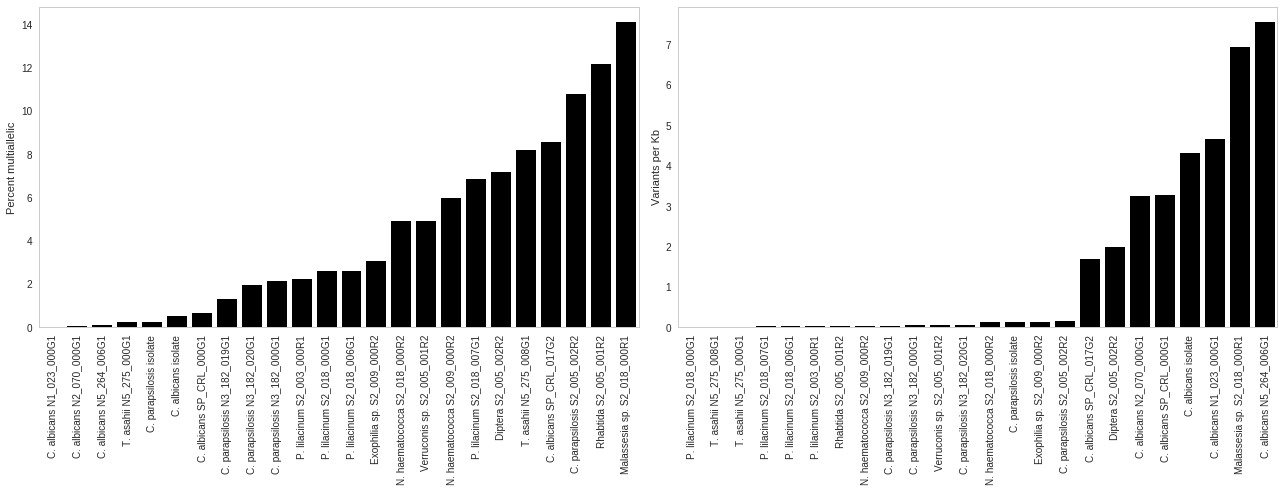

In [62]:
plt.subplot(1, 2, 1)
s_name = [x for _,x in sorted(zip(percent_multi,names))]
s_multi = sorted(percent_multi)
ax = sns.barplot(x=s_name, y=s_multi, color="black")
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Percent multiallelic')
plt.subplot(1, 2, 2)
s_name = [x for _,x in sorted(zip(SNPs_per_kb,names))]
s_SNPs_per_kb = sorted(SNPs_per_kb)
ax = sns.barplot(x=s_name, y=s_SNPs_per_kb, color="black") 
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Variants per Kb')
plt.gcf().set_size_inches(18, 7)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig('figureG_bottompanel_barplots.pdf')

In [47]:
percent_multi

[0.524578662882472,
 0.2368265245707519,
 0.6477909600407599,
 9.328694755830433,
 2.152317880794702,
 1.3011152416356877,
 1.951951951951952,
 10.763097949886106,
 2.2404779686333085,
 2.622950819672131,
 2.61569416498994,
 6.844741235392321,
 4.886594136087036,
 5.96078431372549,
 3.061224489795918,
 4.905660377358491,
 8.188585607940446,
 0.2331002331002331,
 14.099526066350712,
 12.143559488692231,
 7.167922683081171]

In [48]:
s_name

['P. lilacinum S2_018_000G1',
 'T. asahii N5_275_008G1',
 'T. asahii N5_275_000G1',
 'P. lilacinum S2_018_007G1',
 'P. lilacinum S2_018_006G1',
 'P. lilacinum S2_003_000R1',
 'Rhabtida S2_005_001R2',
 'N. haematococca S2_009_000R2',
 'C. parapsilosis N3_182_019G1',
 'C. parapsilosis N3_182_000G1',
 'Verruconis sp. S2_005_001R2',
 'C. parapsilosis N3_182_020G1',
 'N. haematococca S2_018_000R2',
 'C. parapsilosis isolate',
 'Exophilia sp. S2_009_000R2',
 'C. parapsilosis S2_005_002R2',
 'C. albicans SP_CRL_017G2',
 'Diptera S2_005_002R2',
 'C. albicans SP_CRL_000G1',
 'C. albicans isolate',
 'Malassesia sp. S2_018_000R1']

In [49]:
gut=[s_multi[1]] + [s_multi[2]] + [s_multi[8]] + [s_multi[9]] + [s_multi[11]] + [s_multi[16]] + [s_multi[18]]
room=[s_multi[6]] + [s_multi[7]] + [s_multi[10]] + [s_multi[12]] + [s_multi[14]] + [s_multi[15]] + [s_multi[17]] + [s_multi[19]]

In [50]:
data = []
data.append(gut)
data.append(room)

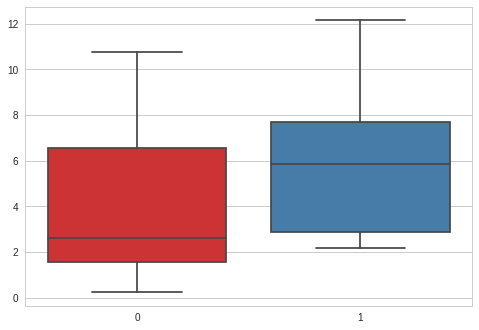

In [51]:
sns.set_palette('Set1')
sns.boxplot(data=data)
#sns.swarmplot(data=data)
#plt.savefig('figure5_boxplot.pdf')

In [52]:
stat, p = ranksums(gut, room)

In [53]:
p

0.35453947977350131

# Checking for affect of coverage

In [47]:
allele_stats = []
allele_stats.append(build_snp_info_table_DP_filt(90,270,'C. parapsilosis N3_182_000G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/mapping/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(70,190,'C. parapsilosis N3_182_019G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_019G1.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(25,75,'C. parapsilosis N3_182_020G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_020G1.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(35,105,'P. lilacinum S2_003_000R1', 35724498, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_003_000R1_concoct_16/S2_003_000R1_concoct_16.fasta-vs-S2_003_000R1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(10,30,'P. lilacinum S2_018_006G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/mapping/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_006G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(7,21,'P. lilacinum S2_018_000G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_000G1.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(9,13,'P. lilacinum S2_018_007G1', 35688710, "/data8/Human/FungiPaper/SNPcalling/infantMappingQuatro/S2_018_006G1_concoct_14/S2_018_006G1_concoct_14.fasta-vs-S2_018_007G1.bam.bam.rmdup.vcf"))

In [48]:
names = []
percent_multi = []
SNPs_per_kb = []
for table in allele_stats:
    names.append(table['name'])
    percent_multi.append(table['total_multiallelic']/table['total'] * 100)
    SNPs_per_kb.append(table['total']/table['genome_length'] * 1000)

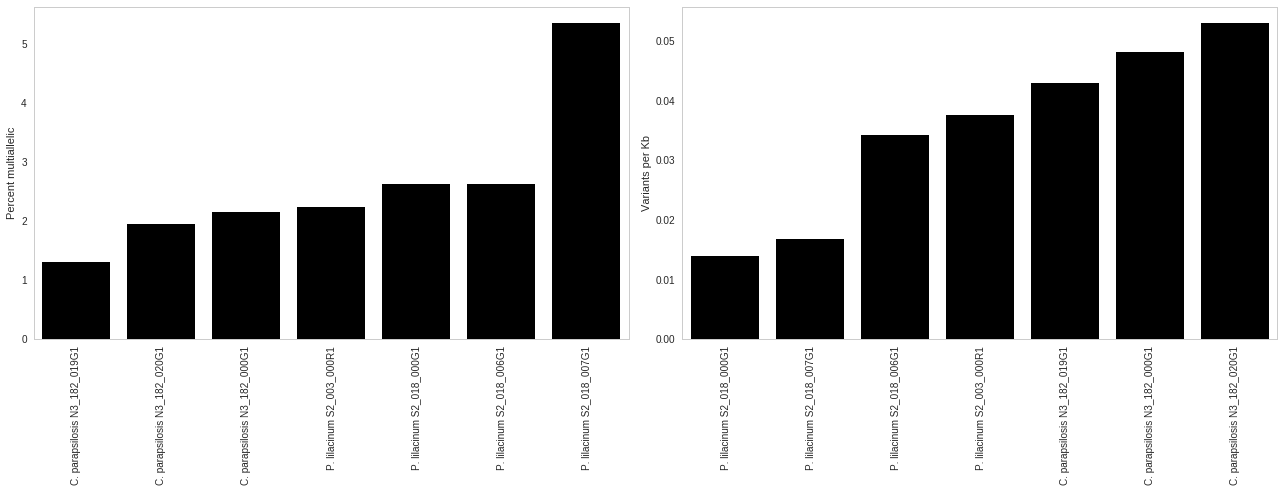

In [49]:
plt.subplot(1, 2, 1)
s_name = [x for _,x in sorted(zip(percent_multi,names))]
s_multi = sorted(percent_multi)
ax = sns.barplot(x=s_name, y=s_multi, color="black")
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Percent multiallelic')
plt.subplot(1, 2, 2)
s_name = [x for _,x in sorted(zip(SNPs_per_kb,names))]
s_SNPs_per_kb = sorted(SNPs_per_kb)
ax = sns.barplot(x=s_name, y=s_SNPs_per_kb, color="black") 
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Variants per Kb')
plt.gcf().set_size_inches(18, 7)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig('figureG_bottompanel_barplots.pdf')

In [50]:
s_multi_cov = [130, 50, 180, 70, 14, 20, 10]

In [55]:
s_SNPs_per_kb_cov = [14, 10, 20, 70, 130, 180, 50]

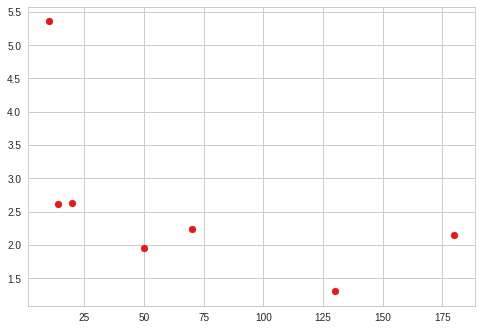

In [54]:
plt.scatter(x=s_multi_cov, y=s_multi)

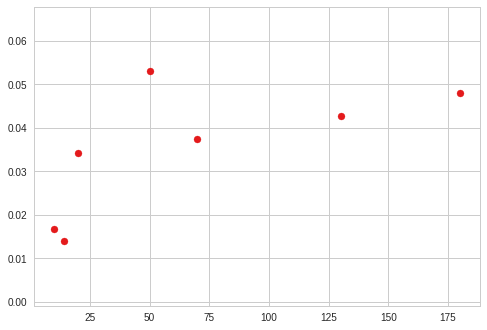

In [56]:
plt.scatter(x=s_SNPs_per_kb_cov, y=s_SNPs_per_kb)

# Parapsilosis heterozygosity

In [12]:
allele_stats = []
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. parapsilosis N3_182_000G1', 12563647, "/data8/Human/FungiPaper/SNPcalling/mapping/N3_182_000G1_concoct_17/N3_182_000G1_concoct_17.fasta-vs-N3_182_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. parapsilosis C1_006_012G1', 12563647, "/data4/human/candida_sampling/SNP_calling/vcfs/Firek_FetalMetagenome_6_12_D_replicate1_S175_001.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. parapsilosis S2_005_002R2', 12563647, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCA_000182765.2_ASM18276v2_genomic.fna-vs-S2_005_002R2.sorted.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. parapsilosis subway', 12563647, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/subway_vs_GCA_000182765.2_ASM18276v2_genomic.fna_mapped.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. parapsilosis GA1', 12563647, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/parapsilosis.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. parapsilosis CBS1954', 12563647, "/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/CBS1954_vs_GCA_000182765.2_ASM18276v2_genomic.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. parapsilosis CBS6318', 12563647, "/data4/human/candida_sampling/ref_datasets/additional_parap_genomes/vcfs/CBS6318_vs_GCA_000182765.2_ASM18276v2_genomic.vcf"))


In [13]:
names = []
percent_multi = []
SNPs_per_kb = []
for table in allele_stats:
    names.append(table['name'])
    percent_multi.append(table['total_multiallelic']/table['total'] * 100)
    SNPs_per_kb.append(table['total']/table['genome_length'] * 1000)

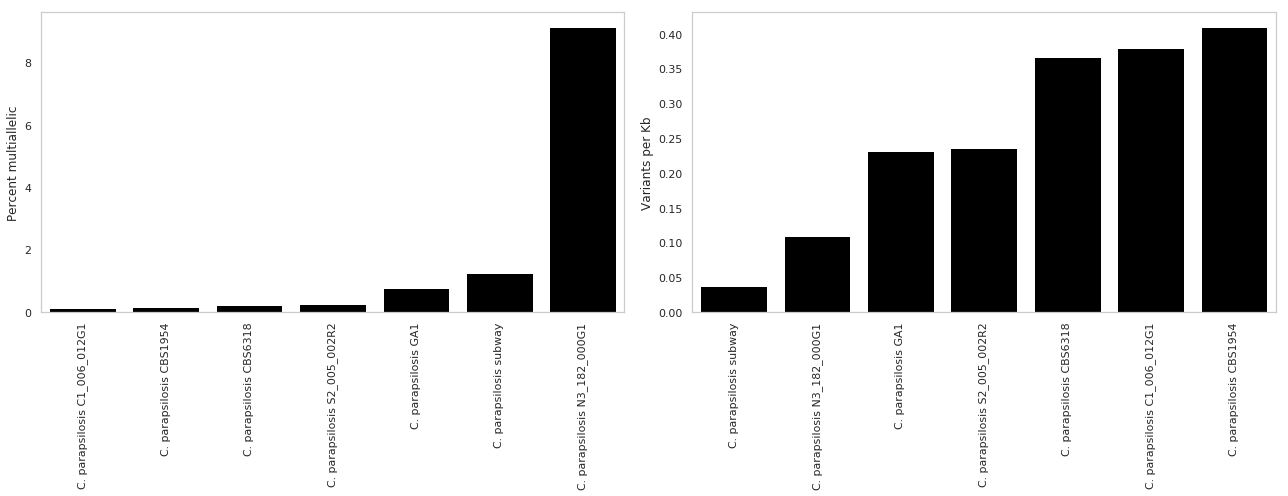

In [14]:
plt.subplot(1, 2, 1)
s_name = [x for _,x in sorted(zip(percent_multi,names))]
s_multi = sorted(percent_multi)
ax = sns.barplot(x=s_name, y=s_multi, color="black")
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Percent multiallelic')
plt.subplot(1, 2, 2)
s_name = [x for _,x in sorted(zip(SNPs_per_kb,names))]
s_SNPs_per_kb = sorted(SNPs_per_kb)
ax = sns.barplot(x=s_name, y=s_SNPs_per_kb, color="black") 
plt.xticks(rotation=90)
plt.grid(False)
plt.ylabel('Variants per Kb')
plt.gcf().set_size_inches(18, 7)
plt.tight_layout()
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('figureG_bottompanel_barplots.pdf')

In [20]:
SNPs_per_kb

[0.1231330361319448,
 0.37982601707927643,
 0.3421777132070011,
 0.2604339329177268,
 0.19906640165869036,
 0.4108679589612793,
 0.3682847822769933]

In [8]:
allele_stats = []
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. albicans S3_003_012Y1', 12561678, "/data4/human/candida_sampling/ref_datasets/albicans_mappings/vcfs/S3_003_012Y1_vs_GCA_000182965.3_ASM18296v3_genomic.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. albicans S3_016_000X1', 12561678, "/data4/human/candida_sampling/ref_datasets/albicans_mappings/vcfs/S3_016_000X1_vs_GCA_000182965.3_ASM18296v3_genomic.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. albicans SP_CRL', 12561678, "/data8/Human/FungiPaper/SNPcalling/mapping/SP_CRL_000G1_concoct_7/SP_CRL_000G1_concoct_7.fasta-vs-SP_CRL_000G1.sam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. albicans N1_023_000G1', 12561678, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N1_023_000G1.sorted.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. albicans N5_264_006G1', 12561678, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N5_264_006G1.sorted.bam.bam.rmdup.vcf"))
allele_stats.append(build_snp_info_table_DP_filt(6,2000,'C. albicans N2_070_000G1', 12561678, "/data8/Human/FungiPaper/comparative_genomics/alignmentToReference/Quatro/mapping/vcfs/GCF_000182965.3_ASM18296v3_genomic.fna-vs-N2_070_000G1.sorted.bam.bam.rmdup.vcf"))


In [9]:
names = []
percent_multi = []
SNPs_per_kb = []
for table in allele_stats:
    names.append(table['name'])
    percent_multi.append(table['total_multiallelic']/table['total'] * 100)
    SNPs_per_kb.append(table['total']/table['genome_length'] * 1000)

In [10]:
SNPs_per_kb

[3.2335648151465115,
 6.521819775988527,
 4.198244852319889,
 6.621249167507717,
 9.938958791970308,
 8.402699066159792]